In [1]:
# IMPORT DATA :

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


df =pd.read_csv("C:/Users/Michel/Documents/GitHub/IntroML/HousingData/HousingData_post_treatment.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.303130,0.693333


In [2]:
# Prepare Data :

x = df.drop('MEDV', axis=1)
y = df['MEDV']
 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [14]:
# Random Forest
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [3]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.metrics import log_loss


In [11]:
# 3. Optimize the depth of the tree using cross-validation

# Define the cvp (cross-validation procedure) with random 1000 samples, 2/3 training size, and 1/3 test size
cvp = ShuffleSplit(n_splits=1000,test_size=1/3)

# Define the max depths between 1 and 10
n_depths = 10
depths = np.linspace(1, 10, n_depths)

# Loop on the max_depth parameter and compute median RMSE
tab_RMSE_tree = np.zeros(n_depths)
for i in range(n_depths):
    reg_tree = DecisionTreeRegressor(max_depth=depths[i])
    tab_RMSE_tree[i] = np.median(np.sqrt(-cross_val_score(reg_tree, x, y, scoring='neg_mean_squared_error', cv=cvp)))



Text(0, 0.5, 'RMSE')

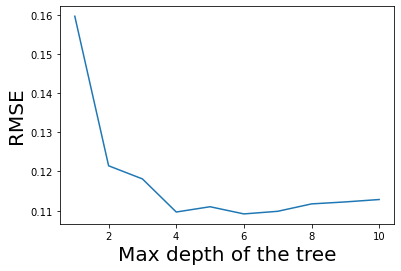

In [10]:
# Plot
plt.plot(depths, tab_RMSE_tree)
plt.xlabel('Max depth of the tree', size=20)
plt.ylabel('RMSE', size=20)

In [15]:
result = np.where(tab_RMSE_tree == min(tab_RMSE_tree))
optimal_depths = int(depths[result])
optimal_depths

4

In [15]:
Y_pred = regressor.predict(X_test)

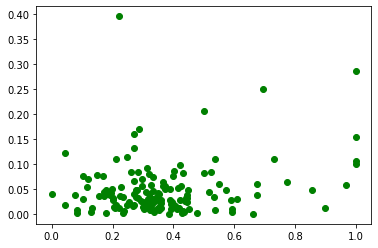

In [18]:
# Visualising the Random Forest Regression results
  

  
y_pred = regressor.predict(X_test)
plt.scatter(y_test, abs(y_pred - y_test) ,color='g') 



plt.show()

In [19]:
# RMSE :

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.005044731302794018